In [75]:
# Default view settings
import matplotlib

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Prediction of the SOXX stock price through Time Series
On this project we'll try to predict accurately the stock price of the iShares Semiconductor ETF `SOXX`. `SOXX` is an Exchange Trading Fund (ETF) that seeks to track the investment results of an index composed of U.S.-listed equities in the semiconductor sector (design, manufature, and distribute semiconductors). The relevance of this study relies on the actual (Nov 2021) global shortage of semiconductor chips.

We will use de marked dat downloader called `yfinance` a Python library tha pulls current and historical stock market price data from Yahoo Finance.

In [62]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [64]:
stock_data = yf.download('SOXX', period = 'ytd',
                      progress=False)

In [65]:
print(f'Downloaded {stock_data.shape[0]} rows of data.')

stock_data.head()

Downloaded 223 rows of data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,381.640015,389.779999,374.859985,377.589996,375.511932,829200
2021-01-05,377.290009,385.309998,377.000000,385.309998,383.189484,556900
2021-01-06,381.100006,391.609985,380.570007,384.059998,381.946320,1071700
2021-01-07,389.679993,399.529999,389.679993,398.549988,396.356598,603000
2021-01-08,404.260010,406.109985,394.079987,398.760010,396.565460,706600


### Convert Prices -> returns
**Adjusted close price**: Reflects the stock's value after accounting for any corporate actions. Differs from the *close price* which is just the cash value of the last transacted price the market closes.

We'll focus only on the adjusted close prices and we'll convert them to simple and log returns.

In [66]:
df = stock_data.loc[:, ['Adj Close']]  # Keep only on the adjusted close prices
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

df['simple_rtn'] = df.adj_close.pct_change()               # Convert to simple return
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1)) # Convert to log return
df.dropna(how = 'any', inplace = True)
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2021-01-05,383.189484,0.020446,0.020239
2021-01-06,381.946320,-0.003244,-0.003250
2021-01-07,396.356598,0.037729,0.037034
2021-01-08,396.565460,0.000527,0.000527
2021-01-11,400.583221,0.010131,0.010080


### Ploting 

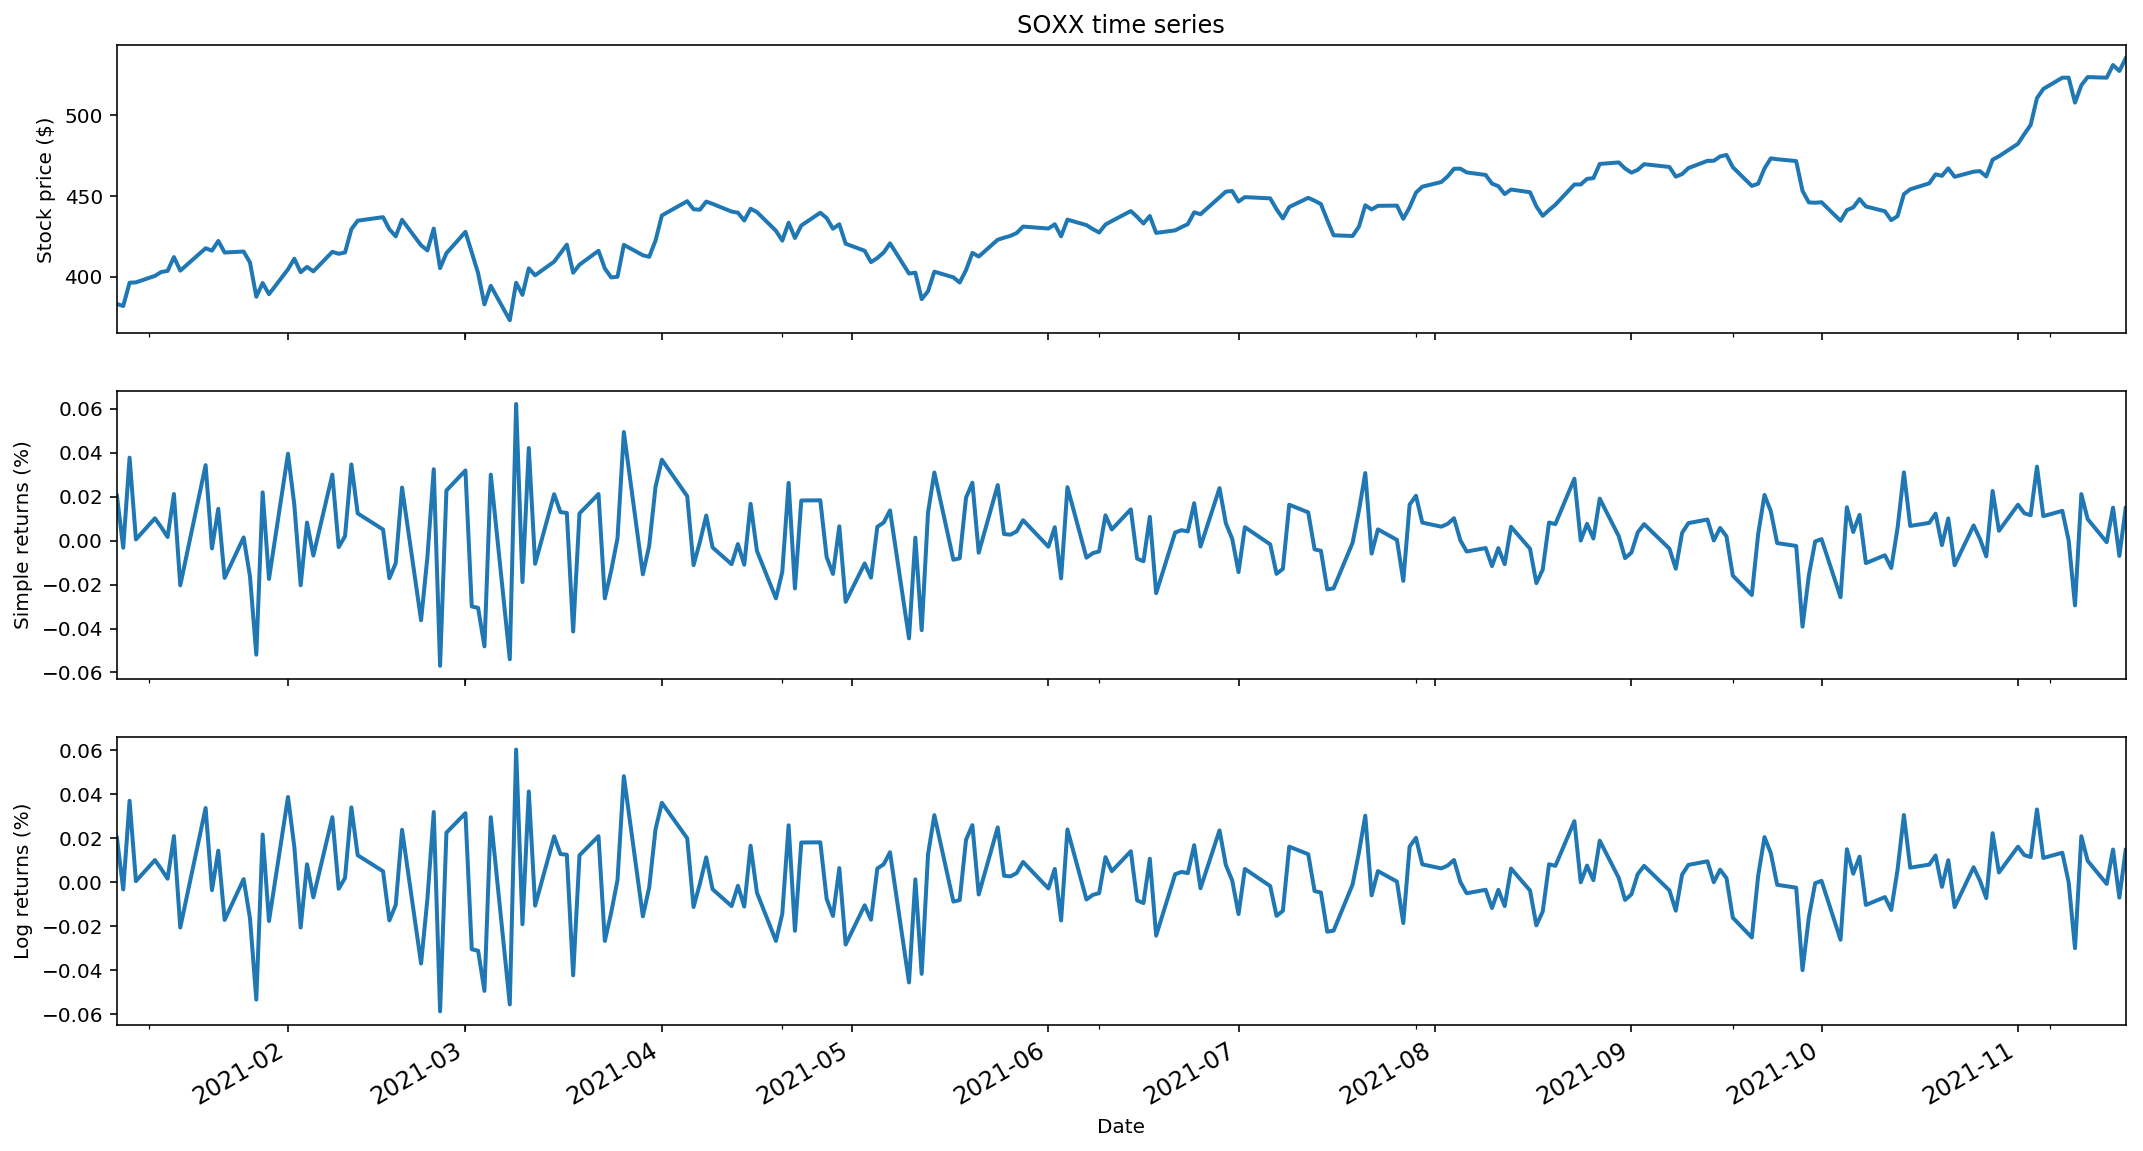

In [76]:
fig, ax = plt.subplots(3, 1, figsize=(18, 10), sharex=True)

# add prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'SOXX time series',
         ylabel = 'Stock price ($)')

# add simple returns 
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

# add log returns 
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
         ylabel = 'Log returns (%)')
ax[2].tick_params(axis='x',
                 which='major',
                 labelsize=12)
plt.show()

# To be continued ...